# R-NVP

**Goal:** Finish up the optimization studies from the first plug-and-play Real-NVP notebook.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.preprocessing import StandardScaler

from scipy.stats import binned_statistic_2d
from scipy.stats import norm 
from scipy.stats import pearsonr

import os
os.sys.path.append('../code')
from plotting import SR_x, SR_y1, SR_y2

import torch
from torch import nn
import torch.optim as optim

os.sys.path.append("../../pytorch-flows")
import flows as fnn

from uproot_methods.classes.TLorentzVector import TLorentzVectorArray

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


In [2]:
nSelectedJets = 5

subDir = 'data_16_PFlow-MAY2019'
if nSelectedJets != 4:
    subDir += f'-{nSelectedJets}jets'
    
trigger ='2016_triggers'

fDir = f"../data/{subDir}/"

tag = '_NNT_HCs'
fout = f"{fDir}df_f_0.22{tag}.h5"

df = pd.read_hdf(fout,key='df')

In [3]:
df['m_hh_cor2'] = df['m_hh'] - df['m_h1'] - df['m_h2'] + 250
df['log_m_hh_cor2'] = np.log(df['m_hh'] - df['m_h1'] - df['m_h2'])

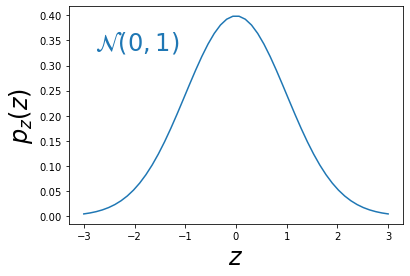

In [19]:
z = np.linspace(-3,3)
pz = np.exp(-xx**2/2) / np.sqrt(2*np.pi)

plt.plot(z,pz)
plt.xlabel('$z$',fontsize=24)
plt.ylabel('$p_z(z)$',fontsize=24)

ax = plt.gca()
plt.text(.08,.9,'$\mathcal{N}(0,1)$',ha='left',va='top',color='C0',
         fontsize=24,transform=ax.transAxes)

plt.savefig('figures/gaussian_1d_ex.pdf',bbox_inches='tight')

Text(0.95, 0.9, '2b pairAGraph SR')

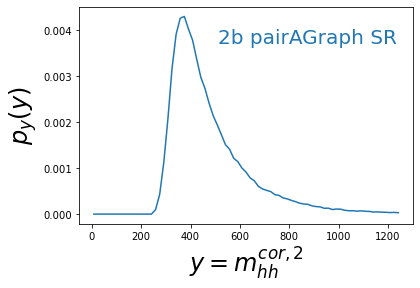

In [43]:
mask = (df.kinematic_region==0) & (df.ntag == 2)
n,e = np.histogram(df.loc[mask,'m_hh_cor2'],75,(0,1250),density=True)

xi = 0.5*(e[:-1] + e[1:])
plt.plot(xi,n)

plt.xlabel('$y = m_{hh}^{cor,2}$',fontsize=24)
plt.ylabel('$p_y(y)$',fontsize=24)

ax = plt.gca()
plt.text(.95,.9,'2b pairAGraph SR',ha='right',va='top',color='C0',
         fontsize=20,transform=ax.transAxes)

plt.savefig('figures/pairAGra',bbox_inches='tight')

In [ ]:
plt.savefig('figures/gaussian_1d_ex.pdf',bbox_inches='tight')